In [1]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Austin_Animal_Center_Intakes.csv")
df = df[df["Animal Type"] != 'Dog']

In [3]:
df.head()

,Unnamed: 0,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
2,2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby
8,8,A679549,*Gilbert,05/22/2014 03:43:00 PM,05/22/2014 03:43:00 PM,124 W Anderson in Austin (TX),Stray,Normal,Cat,Intact Male,1 month,Domestic Shorthair Mix,Black/White
9,9,A683798,Mustachala,07/21/2016 12:16:00 PM,07/21/2016 12:16:00 PM,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Spayed Female,3 years,Domestic Medium Hair Mix,White/Black
11,11,A683656,NaN,07/13/2014 01:20:00 PM,07/13/2014 01:20:00 PM,8238 Research Blvd in Austin (TX),Stray,Normal,Cat,Intact Male,2 months,Snowshoe Mix,Lynx Point
12,12,A709749,*Janeane,08/12/2015 06:29:00 PM,08/12/2015 06:29:00 PM,4800 Weletka Dr in Austin (TX),Stray,Normal,Cat,Intact Female,1 year,Domestic Shorthair Mix,Calico


In [4]:
'''
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))
                                                                                      
'''

'\nprint("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))\n\nprint("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),\n                                                                           ", ".join(df.variety.unique()[0:5])))\n\nprint("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),\n                                                                                      ", ".join(df.country.unique()[0:5])))\n                                                                                      \n'

In [5]:
text = " ".join(review for review in df['Breed'])
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(["Mix", "mix"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

There are 854589 words in the combination of all review.


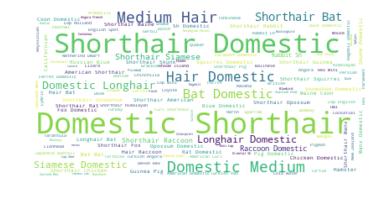

In [6]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:

cat_mask = np.array(Image.open("Sitting-Dog-Silhouette1.png"))
cat_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [8]:
'''
def transform_format(val):
    if val.all() == 0:
        return 255
    else:
        return val

    
# Transform your mask into a new one that will work with the function:
transformed_dog_mask = np.ndarray((dog_mask.shape[0],dog_mask.shape[1]), np.int32)

for i in range(len(dog_mask)):
    transformed_dog_mask[i] = list(map(transform_format, dog_mask[i]))
    
'''

'\ndef transform_format(val):\n    if val.all() == 0:\n        return 255\n    else:\n        return val\n\n    \n# Transform your mask into a new one that will work with the function:\ntransformed_dog_mask = np.ndarray((dog_mask.shape[0],dog_mask.shape[1]), np.int32)\n\nfor i in range(len(dog_mask)):\n    transformed_dog_mask[i] = list(map(transform_format, dog_mask[i]))\n    \n'

In [9]:
transformed_cat_mask = cat_mask 

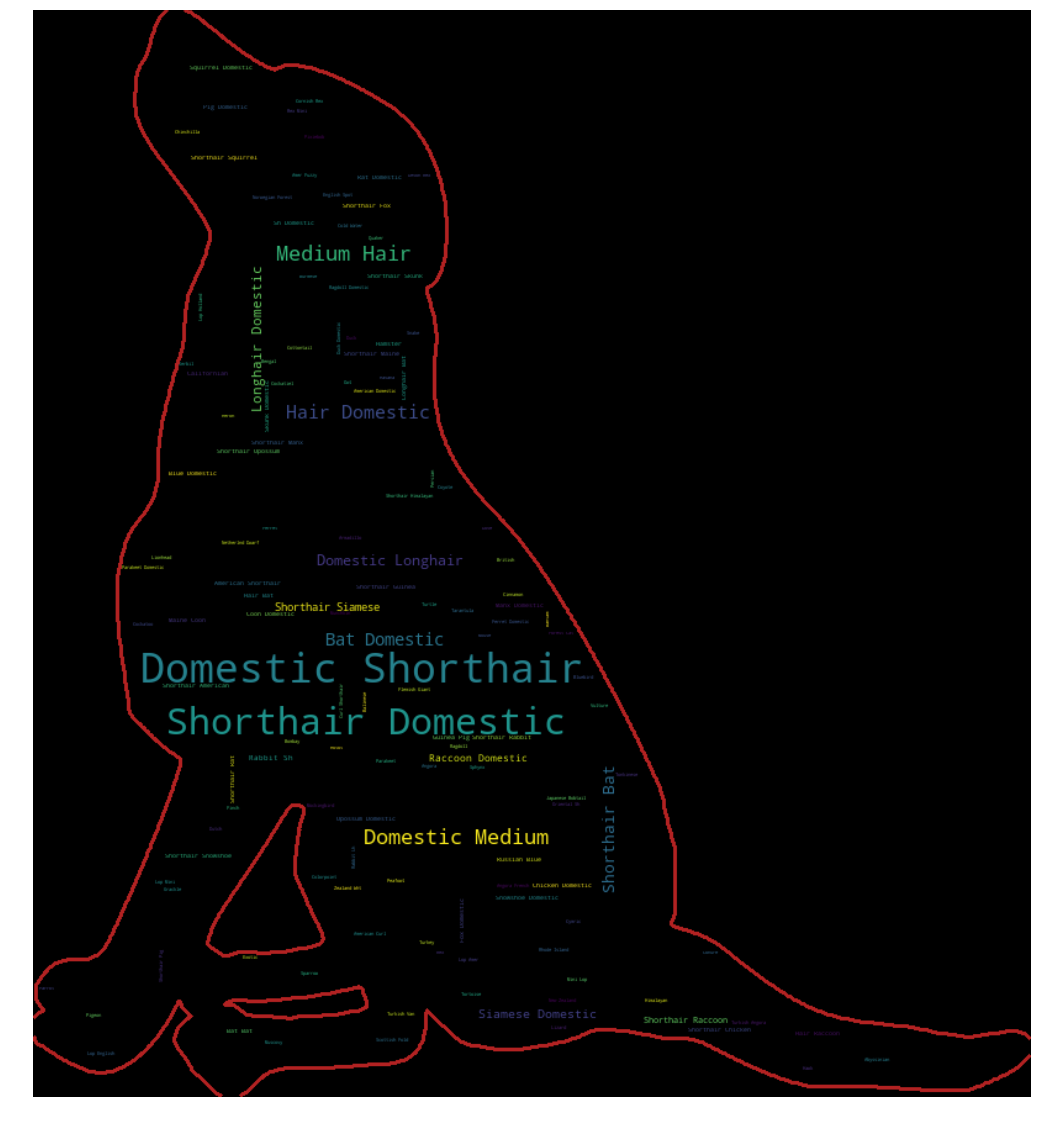

In [10]:
wc = WordCloud(background_color="black", max_words=1000, mask=transformed_cat_mask,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("cat_cloud.png")

# show
plt.figure(figsize=[30,20])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()